# S13 T02: Databases MySQL

**Objectives:**
 - Develop a simple relational database using MySQL
 - Make simple queries with Pandas and make some graphics.

## Level 1 - Exercise 1
**Develop a simple relational database using MySQL(https://www.mysql.com/) and Python**






In [2]:
#!python -m pip install mysql-connector-python

**Conection to MySQL database**

In [3]:
import mysql.connector

In [4]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="shopDB"
)

**Create Tables**

We create the relational database tables completed in the exercise S13T01.

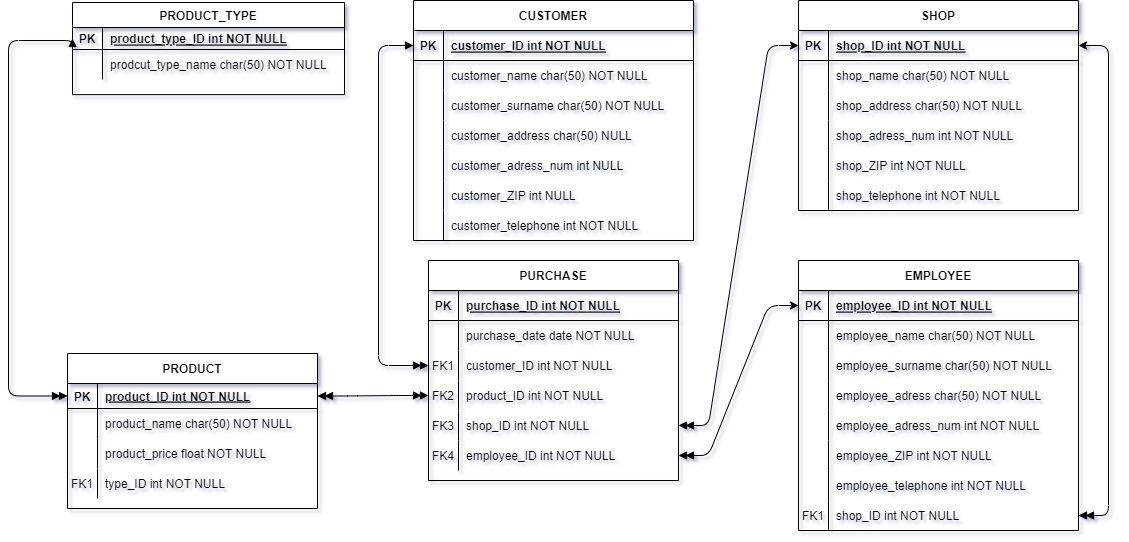

In [5]:
mycursor = mydb.cursor()

mycursor.execute("DROP TABLE IF EXISTS PURCHASE")
mycursor.execute("DROP TABLE IF EXISTS EMPLOYEE")
mycursor.execute("DROP TABLE IF EXISTS PRODUCT")
mycursor.execute("DROP TABLE IF EXISTS CUSTOMER")
mycursor.execute("DROP TABLE IF EXISTS SHOP")
mycursor.execute("DROP TABLE IF EXISTS PRODUCT_TYPE")


mycursor.execute("CREATE TABLE CUSTOMER(\
                                        customer_ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,\
                                        customer_name CHAR(50) NOT NULL,\
                                        customer_surname CHAR(50) NOT NULL,\
                                        customer_adress CHAR(50) NULL,\
                                        customer_adress_num INT NULL,\
                                        customer_ZIP INT NULL,\
                                        customer_telephone INT NOT NULL)")

mycursor.execute("CREATE TABLE SHOP(\
                                      shop_ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,\
                                      shop_name CHAR(50) NOT NULL,\
                                      shop_adress CHAR(50) NOT NULL,\
                                      shop_adress_num INT NOT NULL,\
                                      shop_ZIP INT NOT NULL,\
                                      shop_telephone INT NOT NULL)")

mycursor.execute("CREATE TABLE PRODUCT_TYPE(\
                                              product_type_ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,\
                                              product_type_name CHAR(50) NOT NULL)")

mycursor.execute("CREATE TABLE PRODUCT(\
                                        product_ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,\
                                        product_name CHAR(50) NOT NULL,\
                                        product_price FLOAT NOT NULL,\
                                        product_type_ID INT NOT NULL,\
                                        FOREIGN KEY (product_type_ID) REFERENCES PRODUCT_TYPE (product_type_ID))")

mycursor.execute("CREATE TABLE EMPLOYEE(\
                                          employee_ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,\
                                          employee_name CHAR(50) NOT NULL,\
                                          employee_surname CHAR(50) NOT NULL,\
                                          employee_adress CHAR(50) NOT NULL,\
                                          employee_adress_num INT NOT NULL,\
                                          employee_ZIP INT NOT NULL,\
                                          employee_telephone INT NOT NULL,\
                                          shop_ID INT NOT NULL,\
                                          FOREIGN KEY (shop_ID) REFERENCES SHOP (shop_ID))")

mycursor.execute("CREATE TABLE PURCHASE(\
                                          purchase_ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY,\
                                          purchase_date DATE NOT NULL,\
                                          customer_ID INT NOT NULL,\
                                          product_ID INT NOT NULL,\
                                          shop_ID INT NOT NULL,\
                                          employee_ID INT NOT NULL,\
                                          FOREIGN KEY (customer_ID) REFERENCES CUSTOMER (customer_ID),\
                                          FOREIGN KEY (product_ID) REFERENCES PRODUCT (product_ID),\
                                          FOREIGN KEY (shop_ID) REFERENCES SHOP (shop_ID),\
                                          FOREIGN KEY (employee_ID) REFERENCES EMPLOYEE (employee_ID))")


**Check that the tables have been created correctly**

In [6]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('customer',)
('employee',)
('product',)
('product_type',)
('purchase',)
('shop',)


**Insert initial information on each of the tables**

In [7]:
sql = "INSERT INTO CUSTOMER (customer_name,\
                             customer_surname,\
                             customer_telephone)\
                   VALUES (%s, %s, %s)"

val = [
  ('Peter', 'Cat', 678912345),
  ('Amy', 'Apple', 654123456),
  ('Hannah', 'Mountain', 684930211),
  ('Michael', 'Valley', 624689862),
  ('Sandy', 'Ocean', 635791823),
  ('Betty', 'Green', 698765432),
  ('Richard', 'Sky', 689740352),
  ('Susan', 'One', 683947284),
  ('Vicky', 'Yellow', 618293045),
  ('Ben', 'Park', 639284963),
  ('William', 'Central', 639485767),
  ('Chuck', 'Main', 648392847),
  ('Viola', 'Sideway', 619283701)
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

13 was inserted.


In [8]:
sql = "INSERT INTO SHOP (shop_name,\
                         shop_adress,\
                         shop_adress_num,\
                         shop_ZIP,\
                         shop_telephone)\
                   VALUES (%s, %s, %s, %s, %s)"

val = [
  ('Bon Preu Diagonal', 'Av Diagonal', 343, 8030, 938912345),
  ('Bon Preu Poble Sec', 'Carrer Antic', 43, 8050, 934123456),
  ('Bon Preu Eixample', 'Av Gran Via', 34, 8005, 934930211),
  ('Bon Preu San Feliu', 'Av Barcelona', 33, 8980, 934689862)
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

4 was inserted.


In [9]:
sql = "INSERT INTO PRODUCT_TYPE (product_type_name) VALUES (%s)"

val = [
  ('Fresh',),
  ('Bakery',),
  ('Pharmacy',),
  ('Seafood',),
  ('Meat',)
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")


5 was inserted.


In [10]:
sql = "INSERT INTO PRODUCT (product_name,\
                         product_price,\
                         product_type_ID)\
                   VALUES (%s, %s, %s)"

val = [
  ('Banana', 4.5, 1),
  ('Apple', 6.5, 1),
  ('Bread', 1.4, 2),
  ('Burguer', 8.9, 5),
  ('Chicken', 6.5, 5),
  ('Prawn', 10.25, 4),
  ('Cod', 6.5, 4),
  ('Tissues', 1, 3),
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")


8 was inserted.


In [11]:
sql = "INSERT INTO EMPLOYEE (employee_name,\
                             employee_surname,\
                             employee_adress,\
                             employee_adress_num,\
                             employee_ZIP,\
                             employee_telephone,\
                             shop_ID)\
                   VALUES (%s, %s, %s, %s, %s, %s, %s)"

val = [
  ('Peter', 'Yellow', 'Calle Villaroel', 123, 8004, 678912345, 3),
  ('Amy', 'Sky', 'Calle Rosello', 23, 8003, 654123456, 3),
  ('Viola', 'Mountain', 'Calle Tarragona', 12, 8006, 684930211, 1),
  ('Michael', 'Central', 'Calle Girona', 13, 8030, 624689862, 2),
  ('Ben', 'Ocean', 'Calle Tio', 56, 8980, 635791823, 4),
  ('Susan', 'Green', 'Calle Lleida', 18, 8980, 698765432, 4)
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")


6 was inserted.


In [12]:
sql = "INSERT INTO PURCHASE (purchase_date,\
                             customer_ID,\
                             product_ID,\
                             shop_ID,\
                             employee_ID)\
                   VALUES (%s, %s, %s, %s, %s)"

val = [
  ('2020-7-04', '1', '1', '1', '3'),
  ('2020-7-04', '1', '2', '1', '3'),
  ('2020-7-04', '1', '3', '1', '3'),
  ('2020-7-04', '1', '4', '1', '3'),
  ('2020-7-04', '1', '5', '1', '3'),
  ('2020-7-04', '1', '6', '1', '3'),
  ('2020-7-04', '1', '7', '1', '3'),
  ('2020-7-04', '1', '8', '1', '3'),
  ('2020-7-05', '2', '1', '2', '4'),
  ('2020-7-05', '2', '3', '2', '4'),
  ('2020-7-05', '3', '5', '2', '4'),
  ('2020-7-05', '4', '7', '3', '1'),
  ('2020-7-05', '5', '2', '3', '1'),
  ('2020-7-05', '6', '3', '3', '1'),
  ('2020-7-06', '7', '4', '3', '1'),
  ('2020-7-06', '7', '2', '4', '5'),
  ('2020-7-05', '8', '4', '4', '5'),
  ('2020-7-05', '8', '6', '4', '5'),
  ('2020-7-05', '8', '8', '4', '5'),
  ('2020-7-06', '9', '7', '4', '6'),
  ('2020-7-06', '9', '4', '4', '6'),
  ('2020-7-06', '9', '2', '4', '6'),
  ('2020-7-04', '9', '1', '4', '6'),
  ('2020-7-04', '9', '5', '4', '6'),
  ('2020-7-04', '9', '3', '4', '6'),
  ('2020-7-04', '9', '1', '4', '6'),
  ('2020-7-07', '11', '2', '4', '6'),
  ('2020-7-07', '11', '4', '4', '6'),
  ('2020-7-07', '11', '7', '4', '6'),
  ('2020-7-06', '12', '8', '4', '6'),
  ('2020-7-06', '12', '1', '4', '6')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

31 was inserted.


In [13]:
# Check that the table has been filled correctly
query = "SELECT * FROM PURCHASE"
mycursor.execute(query)
result = mycursor.fetchall()
for row in result:
    print(row)

(1, datetime.date(2020, 7, 4), 1, 1, 1, 3)
(2, datetime.date(2020, 7, 4), 1, 2, 1, 3)
(3, datetime.date(2020, 7, 4), 1, 3, 1, 3)
(4, datetime.date(2020, 7, 4), 1, 4, 1, 3)
(5, datetime.date(2020, 7, 4), 1, 5, 1, 3)
(6, datetime.date(2020, 7, 4), 1, 6, 1, 3)
(7, datetime.date(2020, 7, 4), 1, 7, 1, 3)
(8, datetime.date(2020, 7, 4), 1, 8, 1, 3)
(9, datetime.date(2020, 7, 5), 2, 1, 2, 4)
(10, datetime.date(2020, 7, 5), 2, 3, 2, 4)
(11, datetime.date(2020, 7, 5), 3, 5, 2, 4)
(12, datetime.date(2020, 7, 5), 4, 7, 3, 1)
(13, datetime.date(2020, 7, 5), 5, 2, 3, 1)
(14, datetime.date(2020, 7, 5), 6, 3, 3, 1)
(15, datetime.date(2020, 7, 6), 7, 4, 3, 1)
(16, datetime.date(2020, 7, 6), 7, 2, 4, 5)
(17, datetime.date(2020, 7, 5), 8, 4, 4, 5)
(18, datetime.date(2020, 7, 5), 8, 6, 4, 5)
(19, datetime.date(2020, 7, 5), 8, 8, 4, 5)
(20, datetime.date(2020, 7, 6), 9, 7, 4, 6)
(21, datetime.date(2020, 7, 6), 9, 4, 4, 6)
(22, datetime.date(2020, 7, 6), 9, 2, 4, 6)
(23, datetime.date(2020, 7, 4), 9, 1, 4, 

In [14]:
# Sells by product using GROUP BY
sql = "SELECT COUNT(product_ID) FROM PURCHASE GROUP BY product_ID"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(5,)
(5,)
(4,)
(5,)
(3,)
(2,)
(4,)
(3,)


## Level 2 - Exercise 2
**Show that you can do some simple queries in a Pandas Dataframe.**



In [15]:
import pandas as pd

**View content table**

In [16]:
query = "SELECT * FROM PURCHASE ORDER BY employee_ID"
pd.read_sql(query, mydb)

,purchase_ID,purchase_date,customer_ID,product_ID,shop_ID,employee_ID
0,12,2020-07-05,4,7,3,1
1,13,2020-07-05,5,2,3,1
2,14,2020-07-05,6,3,3,1
3,15,2020-07-06,7,4,3,1
4,1,2020-07-04,1,1,1,3
5,2,2020-07-04,1,2,1,3
6,3,2020-07-04,1,3,1,3
7,4,2020-07-04,1,4,1,3
8,5,2020-07-04,1,5,1,3
9,6,2020-07-04,1,6,1,3


**Add a purchase order and check that the information has been added into the SQL (we only check for the last row added)**

In [17]:
sql = "INSERT INTO PURCHASE (purchase_date,\
                             customer_ID,\
                             product_ID,\
                             shop_ID,\
                             employee_ID)\
                   VALUES (%s, %s, %s, %s, %s)"

val = [
  ('2020-7-07', '13', '1', '4', '6'),
  ('2020-7-07', '13', '2', '4', '6'),
  ('2020-7-07', '13', '1', '4', '6')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

3 was inserted.


In [18]:
query = "SELECT * FROM PURCHASE WHERE purchase_ID=(SELECT LAST_INSERT_ID())"
pd.read_sql(query, mydb)

,purchase_ID,purchase_date,customer_ID,product_ID,shop_ID,employee_ID
0,32,2020-07-07,13,1,4,6


**Update a customer address, which currently are all Null**

In [19]:
sql = "UPDATE CUSTOMER SET  customer_adress = 'Gran Via',\
                            customer_adress_num = '213',\
                            customer_ZIP = '08003'\
                       WHERE customer_ID = '3'"

mycursor.execute(sql)

In [20]:
query = "SELECT * FROM CUSTOMER WHERE customer_ID='3'"
pd.read_sql(query, mydb)

,customer_ID,customer_name,customer_surname,customer_adress,customer_adress_num,customer_ZIP,customer_telephone
0,3,Hannah,Mountain,Gran Via,213,8003,684930211


## Nivell 3 - Exercici 3
**Genera algun gràfic que resumeixi les dades.**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Create a pandas database with all columns from the database
query = "SELECT * FROM PURCHASE \
            LEFT JOIN CUSTOMER USING(customer_ID) \
                LEFT JOIN PRODUCT USING(product_ID) \
                    LEFT JOIN EMPLOYEE USING(employee_ID) \
                        LEFT JOIN PRODUCT_TYPE USING(product_type_ID)\
                            LEFT JOIN SHOP ON PURCHASE.shop_ID = SHOP.shop_ID"

all_purchases = pd.read_sql(query, mydb)

In [23]:
all_purchases.head(5)

,product_type_ID,employee_ID,product_ID,customer_ID,purchase_ID,purchase_date,shop_ID,customer_name,customer_surname,customer_adress,...,employee_ZIP,employee_telephone,shop_ID,product_type_name,shop_ID,shop_name,shop_adress,shop_adress_num,shop_ZIP,shop_telephone
0,1,3,1,1,1,2020-07-04,1,Peter,Cat,None,...,8006,684930211,1,Fresh,1,Bon Preu Diagonal,Av Diagonal,343,8030,938912345
1,1,3,2,1,2,2020-07-04,1,Peter,Cat,None,...,8006,684930211,1,Fresh,1,Bon Preu Diagonal,Av Diagonal,343,8030,938912345
2,2,3,3,1,3,2020-07-04,1,Peter,Cat,None,...,8006,684930211,1,Bakery,1,Bon Preu Diagonal,Av Diagonal,343,8030,938912345
3,5,3,4,1,4,2020-07-04,1,Peter,Cat,None,...,8006,684930211,1,Meat,1,Bon Preu Diagonal,Av Diagonal,343,8030,938912345
4,5,3,5,1,5,2020-07-04,1,Peter,Cat,None,...,8006,684930211,1,Meat,1,Bon Preu Diagonal,Av Diagonal,343,8030,938912345


In [24]:
all_purchases.columns

Index(['product_type_ID', 'employee_ID', 'product_ID', 'customer_ID',
       'purchase_ID', 'purchase_date', 'shop_ID', 'customer_name',
       'customer_surname', 'customer_adress', 'customer_adress_num',
       'customer_ZIP', 'customer_telephone', 'product_name', 'product_price',
       'employee_name', 'employee_surname', 'employee_adress',
       'employee_adress_num', 'employee_ZIP', 'employee_telephone', 'shop_ID',
       'product_type_name', 'shop_ID', 'shop_name', 'shop_adress',
       'shop_adress_num', 'shop_ZIP', 'shop_telephone'],
      dtype='object')

We check which Product and which product types have been sold more often

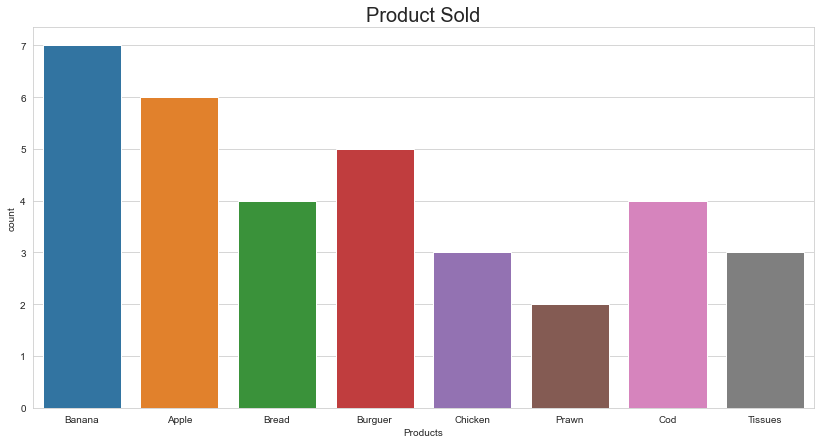

In [31]:
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")

sns.countplot(data=all_purchases, x = 'product_name')
plt.title('Product Sold', size=20);
plt.xlabel('Products');

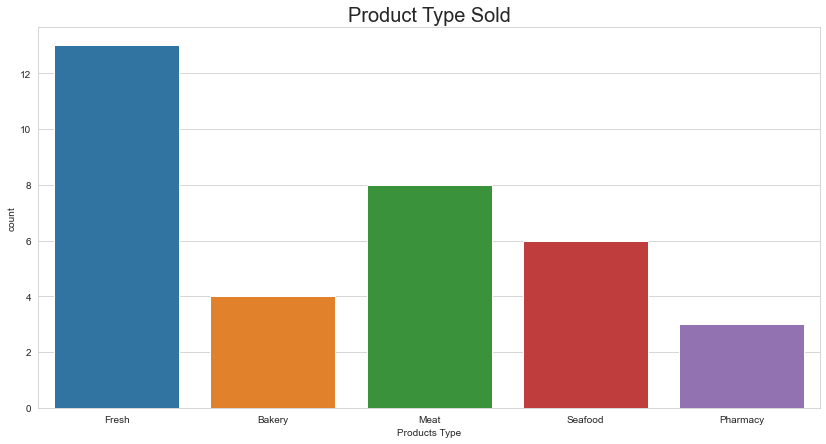

In [35]:
plt.figure(figsize=(14,7))

sns.countplot(data=all_purchases, x = 'product_type_name')
plt.title('Product Type Sold', size=20);
plt.xlabel('Products Type');

Fresh products are the best selling product type and Bananas the best seling Product

We can check which stores or employs make more sales.

In [39]:
# Create a new column with the employs full name
all_purchases['employee_fullname'] = all_purchases['employee_name'] + " " + all_purchases['employee_surname']

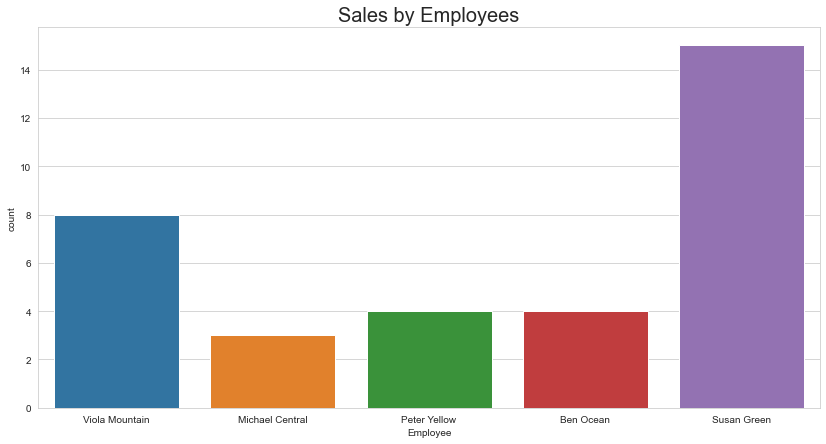

In [40]:
plt.figure(figsize=(14,7))

sns.countplot(data=all_purchases, x = 'employee_fullname')
plt.title('Sales by Employees', size=20);
plt.xlabel('Employee');

Susan Green was the best Seller by a large difference

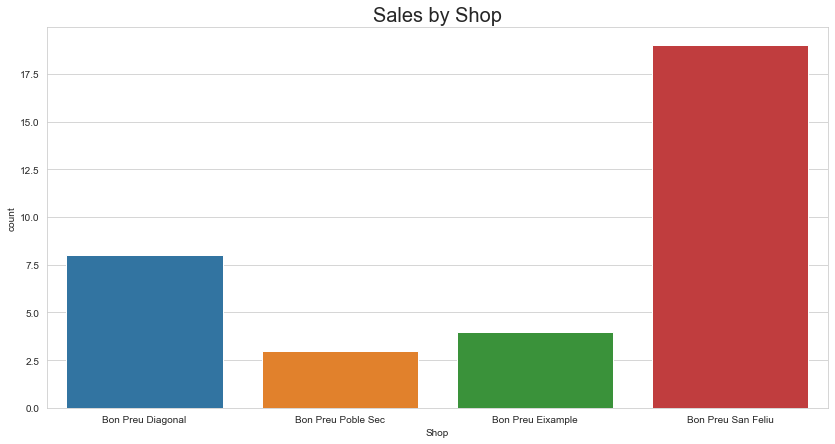

In [41]:
plt.figure(figsize=(14,7))

sns.countplot(data=all_purchases, x = 'shop_name')
plt.title('Sales by Shop', size=20);
plt.xlabel('Shop');

And Bon Preu San Feliu the shop with more purchases

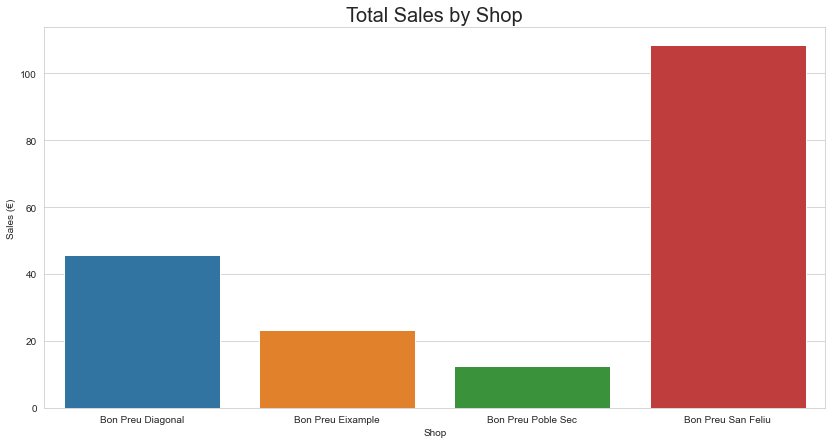

In [82]:
all_purchases_shop_sales = all_purchases.groupby(['shop_name'], as_index=False).sum()

plt.figure(figsize=(14,7))
sns.barplot(data=all_purchases_shop_sales, x='shop_name', y= 'product_price')
plt.title('Total Sales by Shop', size=20)
plt.xlabel('Shop');
plt.ylabel('Sales (€)');


Bon Preu San Feliu has also the highest total sales